# The purpose is to show the ck04models

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels',\
               'ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[11])

In [11]:
filelist1=os.listdir(SEDfile_dir+'/ckm05') 
filelist2=os.listdir(SEDfile_dir+'/ckm10') 
filelist3=os.listdir(SEDfile_dir+'/ckm15') 
filelist4=os.listdir(SEDfile_dir+'/ckm20') 
filelist5=os.listdir(SEDfile_dir+'/ckm25') 
filelist6=os.listdir(SEDfile_dir+'/ckp00') 
filelist7=os.listdir(SEDfile_dir+'/ckp02') 
filelist8=os.listdir(SEDfile_dir+'/ckp05') 

In [12]:
filelist=filelist1 + filelist2 + filelist3 + filelist4 + filelist5+ filelist6 + filelist7 + filelist8

In [13]:
filelist1_group = [os.path.join('ckm05',f) for f in filelist1 if f.endswith('.fits')]
filelist2_group = [os.path.join('ckm10',f) for f in filelist2 if f.endswith('.fits')]
filelist3_group = [os.path.join('ckm15',f) for f in filelist3 if f.endswith('.fits')]
filelist4_group = [os.path.join('ckm20',f) for f in filelist4 if f.endswith('.fits')]
filelist5_group = [os.path.join('ckm25',f) for f in filelist5 if f.endswith('.fits')]
filelist6_group = [os.path.join('ckp00',f) for f in filelist6 if f.endswith('.fits')]
filelist7_group = [os.path.join('ckp02',f) for f in filelist7 if f.endswith('.fits')]
filelist8_group = [os.path.join('ckp05',f) for f in filelist8 if f.endswith('.fits')]

In [14]:
filelist_group=filelist1_group + filelist2_group + filelist3_group + filelist4_group + filelist5_group+ \
filelist6_group + filelist7_group + filelist8_group

In [15]:
#fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [16]:
#fits_files.remove('bzspectype.fits')

## Find the star-names in the files

In [17]:
fits_files=filelist_group

In [18]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [19]:
obj_headers[0]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2007-01-09T16:25:09' / Date FITS file was generated                  
IRAF-TLM= '11:25:21 (09/01/2007)' / Time of last modification                   
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 2002-02-22                     
FILENAME= 'ckm05_10000.fits'   / name of file                                   
NEXTEND =                    1 / number of extensions in file                   
TEFF    =                10000                                                  
LOG_Z   =                 -0

In [20]:
obj_temperatures = []
obj_log_z_all = []
index=0
for hdr in obj_headers: 
        obj_temp=obj_headers[index]['TEFF']
        obj_logz=obj_headers[index]['LOG_Z']
        obj_temperatures.append(obj_temp)
        obj_log_z_all.append(obj_logz)
        index+=1

In [21]:
obj_log_z_all

[-0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,

In [22]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [23]:
filelist[:5]

['ckm05_10000.fits',
 'ckm05_10250.fits',
 'ckm05_10500.fits',
 'ckm05_10750.fits',
 'ckm05_11000.fits']

In [24]:
fits_files=filelist

In [25]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('([a-z].+_[0-9].+).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [26]:
print obj_names2

['ckm05_10000', 'ckm05_10250', 'ckm05_10500', 'ckm05_10750', 'ckm05_11000', 'ckm05_11250', 'ckm05_11500', 'ckm05_11750', 'ckm05_12000', 'ckm05_12250', 'ckm05_12500', 'ckm05_12750', 'ckm05_13000', 'ckm05_14000', 'ckm05_15000', 'ckm05_16000', 'ckm05_17000', 'ckm05_18000', 'ckm05_19000', 'ckm05_20000', 'ckm05_21000', 'ckm05_22000', 'ckm05_23000', 'ckm05_24000', 'ckm05_25000', 'ckm05_26000', 'ckm05_27000', 'ckm05_28000', 'ckm05_29000', 'ckm05_30000', 'ckm05_31000', 'ckm05_32000', 'ckm05_33000', 'ckm05_34000', 'ckm05_3500', 'ckm05_35000', 'ckm05_36000', 'ckm05_37000', 'ckm05_3750', 'ckm05_38000', 'ckm05_39000', 'ckm05_4000', 'ckm05_40000', 'ckm05_41000', 'ckm05_42000', 'ckm05_4250', 'ckm05_43000', 'ckm05_44000', 'ckm05_4500', 'ckm05_45000', 'ckm05_46000', 'ckm05_47000', 'ckm05_4750', 'ckm05_48000', 'ckm05_49000', 'ckm05_5000', 'ckm05_50000', 'ckm05_5250', 'ckm05_5500', 'ckm05_5750', 'ckm05_6000', 'ckm05_6250', 'ckm05_6500', 'ckm05_6750', 'ckm05_7000', 'ckm05_7250', 'ckm05_7500', 'ckm05_7750

In [27]:
obj_names=obj_names2

In [28]:
obj_files=filelist_group

In [29]:
objames_and_objfiles = zip(obj_names, obj_files)
objames_and_objtemp = zip(obj_names, obj_temperatures)
objtemp_and_objlogz = zip(obj_temperatures,obj_log_z_all)

## Make a dictionary of filenames

In [30]:
#OBJDict= {}
#for obj,thefile in objames_and_objfiles:
#    print obj,': '
#    OBJDict[obj]=thefile
#    print OBJDict[obj] 

## Plot the SED

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


ParameterOutOfBounds: Parameter 'log G' exceeds data. Min allowed=0.000000, entered=-0.200000.

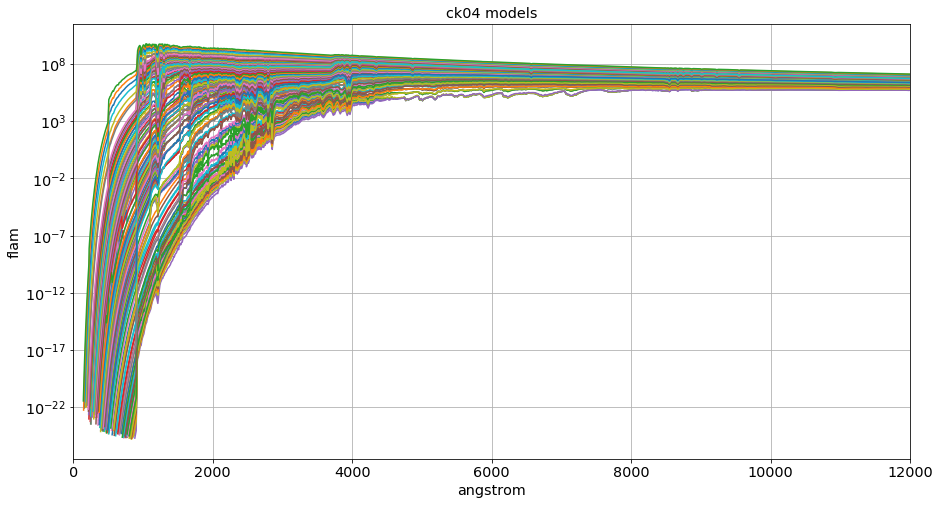

In [31]:
#for keyobj in OBJDict:
#    the_file=OBJDict[keyobj]
#    selected_file=the_file
#    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
#    print selected_fullfile
#    sed=S.FileSpectrum(selected_fullfile)
#    dirs(sed)       
for temp,logz in objtemp_and_objlogz:   
    sed = S.Icat('ck04models', temp, 0, -logz)    
    plt.semilogy(sed.wave,sed.flux)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.title("ck04 models")
    plt.savefig("ck04.png")